In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
import cv2
import random
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array,array_to_img
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dropout,Dense,BatchNormalization,LeakyReLU

In [3]:
X_train, X_test, y_train, y_test = np.load('processed_images.npy',allow_pickle=True)

## バッチ正規化したらどうなる？


バッチ正規化というテクニックもディープラーニングにはあります。<br>
インプットとして渡したデータごとに正規化して渡すことで、高速化したり学習のブレを抑える効果があります。<br>
通常、畳み込み層の後に追加されていきます。

※全結合層やドロップアウトは微調整をしています。

In [4]:
model = Sequential()

model.add(Conv2D(32,3,input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
adam = Adam(lr=1e-4)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [5]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20
79/79 [==============================] - 27s 129ms/step - loss: 2.0934 - accuracy: 0.4866 - val_loss: 2.0159 - val_accuracy: 0.1674
Epoch 2/20
79/79 [==============================] - 9s 114ms/step - loss: 1.0076 - accuracy: 0.6171 - val_loss: 2.3010 - val_accuracy: 0.1674
Epoch 3/20
79/79 [==============================] - 9s 114ms/step - loss: 0.8603 - accuracy: 0.6864 - val_loss: 2.6270 - val_accuracy: 0.1674
Epoch 4/20
79/79 [==============================] - 9s 114ms/step - loss: 0.7395 - accuracy: 0.7291 - val_loss: 1.8517 - val_accuracy: 0.3188
Epoch 5/20
79/79 [==============================] - 9s 114ms/step - loss: 0.6399 - accuracy: 0.7723 - val_loss: 1.2852 - val_accuracy: 0.5574
Epoch 6/20
79/79 [==============================] - 9s 114ms/step - loss: 0.5553 - accuracy: 0.8039 - val_loss: 0.9013 - val_accuracy: 0.7061
Epoch 7/20
79/79 [==============================] - 9s 114ms/step - loss: 0.4861 - accuracy: 0.8310 - val_loss: 0.6373 - val_accuracy: 0.7667
Epoch

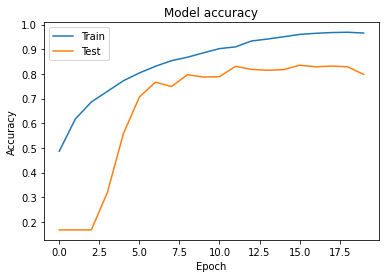

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

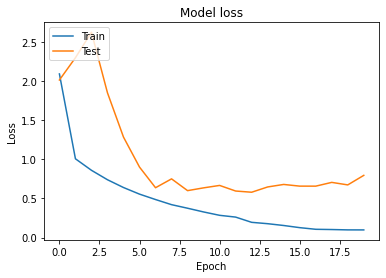

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

最終的な結果は劇的に変わりませんが、学習の収束は若干早くなりました。<br>
しかし、学習を繰り返していくと悪くなるのでエポック数を減らしてもいいかもしれません。<br>
そして、ロスは増加傾向にあります。
この結果を踏まえた上で、新たな試みも試していきます。

## 活性化関数を変えたらどうなるか

活性化関数はReLUをデフォルトで使うものが多いですが、LeakyReLUという種類もあります。<br>
簡単に言うと、ReLUにマイナスの値を返すようにするので、表現力は高くなります。<br>
しかし、だからといって必ずしも高い精度が出せるわけではないので、注意が必要です。

In [8]:
model = Sequential()

model.add(Conv2D(32,3,input_shape=(150,150,3)))
model.add(BatchNormalization())

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU())
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(LeakyReLU())

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
adam = Adam(lr=1e-4)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20
79/79 [==============================] - 10s 119ms/step - loss: 4.5566 - accuracy: 0.4829 - val_loss: 3.5466 - val_accuracy: 0.2538
Epoch 2/20
79/79 [==============================] - 9s 113ms/step - loss: 1.8411 - accuracy: 0.5896 - val_loss: 3.9005 - val_accuracy: 0.2556
Epoch 3/20
79/79 [==============================] - 9s 113ms/step - loss: 1.5700 - accuracy: 0.6480 - val_loss: 2.5092 - val_accuracy: 0.3330
Epoch 4/20
79/79 [==============================] - 9s 113ms/step - loss: 1.4361 - accuracy: 0.6679 - val_loss: 1.6389 - val_accuracy: 0.5013
Epoch 5/20
79/79 [==============================] - 9s 113ms/step - loss: 1.3168 - accuracy: 0.7000 - val_loss: 1.1133 - val_accuracy: 0.6589
Epoch 6/20
79/79 [==============================] - 9s 113ms/step - loss: 1.1370 - accuracy: 0.7253 - val_loss: 0.9024 - val_accuracy: 0.7150
Epoch 7/20
79/79 [==============================] - 9s 113ms/step - loss: 1.0626 - accuracy: 0.7431 - val_loss: 0.7617 - val_accuracy: 0.7596
Epoch

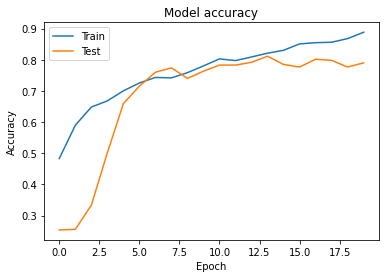

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

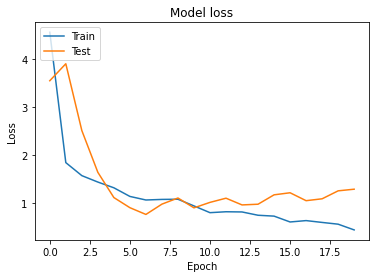

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

こちらも若干汎化性能が上がったけど、劇的な変化はありませんでした。<br>
しかし、ロスの収束はよくなっています。
すべての検証結果を生かして、最終的なモデルを構築していきたいと思います。

こちらもメモリの都合があるので３つ目のノートにしていきます。